### Project Objective:

Execute image classification using Deep Learning

Dataset is cifar10 that contains colored and complex images of 10 classes : airplane,truck,frog,automobile,deer....

Classifiaction is done using 2 models:
- Artificial Neural Network
- Convolutional Neural Network

Each model performance will be assessed in a detailed way.

### Reference

After trying many different type of ANN and CNN to classify the images in cifar 10 set, I was always having a model performance that was not very satisfying even though the CNN model performance was much better then ANN but it still needed improvment.

The CNN model architecture was inspired by "Jason Brownlee" on his personal website where he compared between 3 CNN model and chose the most accurate one to classify cifar10 images.

link : https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

### Importing Libraries

In [1]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

### Preparing the Data

In [2]:
# This librarie was imported because it was noted that we didn't have access to cifar10 dataset and importing 
# this librarie was the solution

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
#download cifar10 data and split into train and test sets
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
#Reshaping y into one array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print(y_train[:5] , y_test[:5] )

[6 9 9 4 1] [3 8 8 0 6]


In [8]:
#normalizing the data
x_train = x_train / 255
x_test = x_test / 255

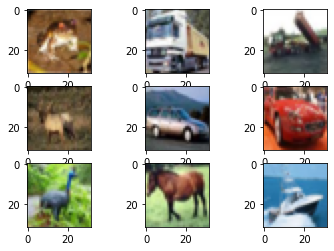

In [9]:
# showing the first 9 figures of x_train set
for i in range(9):
    plt.subplot(330 + 1 + i )
    plt.imshow(x_train[i])
plt.show()

In [10]:
#Create a class list that contains the name of each figure in the same order of the label y
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
#Creating a function that plots the figure with  the name of it's label under it
#instead of laballing by number wich is not verry clear that is why I created the class list which makes things more clear
def plot_sample(x,y,index) :
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

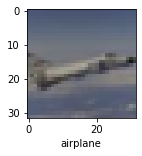

In [12]:
plot_sample(x_train , y_train , 564)

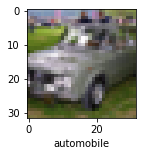

In [13]:
plot_sample(x_train,y_train,44)

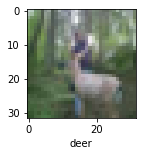

In [14]:
plot_sample(x_train,y_train,9872)

## Classifying images using a simple Artificial Neural network

In [15]:
# Building simple artificial neural network
model_ann = Sequential()
model_ann.add(Flatten(input_shape =(32,32,3) ))
model_ann.add(Dense(3000, activation = "relu"))
model_ann.add(Dense(1000, activation = "relu"))
model_ann.add(Dense(500, activation = "relu"))
model_ann.add(Dense(10,activation = "sigmoid"))

model_ann.compile(optimizer = "SGD",
           loss = "sparse_categorical_crossentropy",
           metrics = ["accuracy"])


In [16]:
#Illustration model_ann in form of text
model_ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


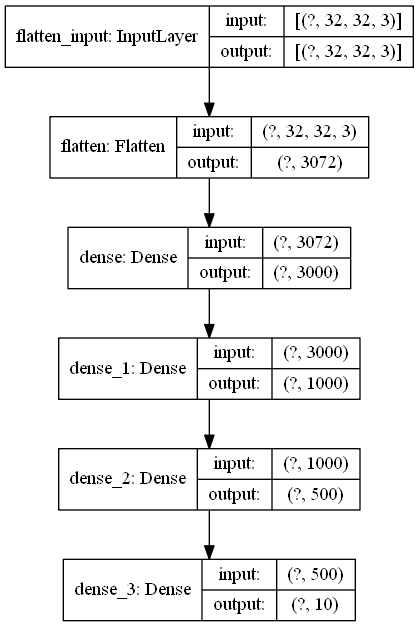

In [17]:
# Illustration model ann in form of diagram
keras.utils.plot_model(model_ann, "my_first_model_with_shape_info.png", show_shapes=True)

In [18]:
batch_size = 32
epochs = 11

In [19]:
#Train model ann 
train_ann =model_ann.fit(x_train, y_train, batch_size=batch_size,validation_split = 0.2,epochs=epochs)

Epoch 1/11
1250/1250 [==============================] - 71s 57ms/step - loss: 1.9028 - accuracy: 0.3138 - val_loss: 1.7388 - val_accuracy: 0.3834
Epoch 2/11
1250/1250 [==============================] - 72s 58ms/step - loss: 1.6836 - accuracy: 0.4022 - val_loss: 1.6496 - val_accuracy: 0.4174
Epoch 3/11
1250/1250 [==============================] - 73s 59ms/step - loss: 1.5955 - accuracy: 0.4327 - val_loss: 1.5703 - val_accuracy: 0.4473
Epoch 4/11
1250/1250 [==============================] - 76s 61ms/step - loss: 1.5323 - accuracy: 0.4559 - val_loss: 1.6005 - val_accuracy: 0.4325
Epoch 5/11
1250/1250 [==============================] - 73s 59ms/step - loss: 1.4750 - accuracy: 0.4772 - val_loss: 1.5539 - val_accuracy: 0.4516
Epoch 6/11
1250/1250 [==============================] - 73s 58ms/step - loss: 1.4303 - accuracy: 0.4934 - val_loss: 1.5042 - val_accuracy: 0.4655
Epoch 7/11
1250/1250 [==============================] - 73s 58ms/step - loss: 1.3873 - accuracy: 0.5095 - val_loss: 1.4539 -

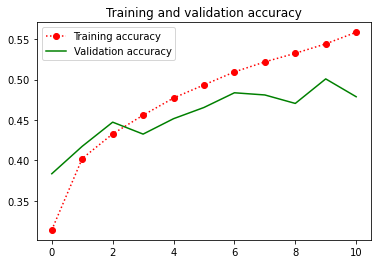

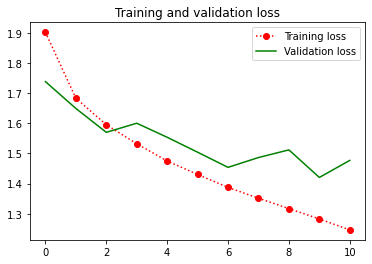

In [20]:
# Visualise model's accuracy during training
accuracy = train_ann.history['accuracy']
val_accuracy = train_ann.history['val_accuracy']
loss = train_ann.history['loss']
val_loss = train_ann.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo',linestyle="dotted", color="red", label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', color="green",label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo',linestyle="dotted", color="red", label='Training loss')
plt.plot(epochs, val_loss, 'b',color="green", label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
#Evaluate network performance of cifar10 test set
test_eval_ann = model_ann.evaluate(x_test , y_test)
print('Test loss of model ann:', test_eval_ann[0])
print('Test accuracy of model ann:', test_eval_ann[1])

313/313 [==============================] - 5s 15ms/step - loss: 1.4485 - accuracy: 0.4787
Test loss of model ann: 1.4485349655151367
Test accuracy of model ann: 0.47870001196861267


In [22]:
#Construct Classification Report on cifar10 test set
y_pred_ann = model_ann.predict(x_test)
y_pred_classes_ann = [np.argmax(element) for element in y_pred_ann]

print("Classification Report : \n", classification_report(y_test , y_pred_classes_ann))

Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.40      0.51      1000
           1       0.54      0.74      0.62      1000
           2       0.55      0.17      0.25      1000
           3       0.45      0.15      0.23      1000
           4       0.43      0.43      0.43      1000
           5       0.40      0.41      0.41      1000
           6       0.58      0.52      0.55      1000
           7       0.33      0.82      0.47      1000
           8       0.55      0.73      0.62      1000
           9       0.62      0.42      0.50      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.46     10000
weighted avg       0.51      0.48      0.46     10000



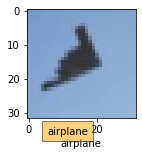

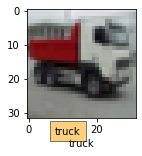

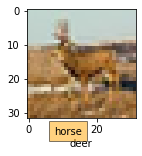

In [23]:
#Ploting example of model classification
plot_sample(x_test , y_test, 1785)
plt.figtext(0.5, 0.01, classes[y_pred_classes_ann[1785]], ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

#Ploting example of model classification
plot_sample(x_test , y_test, 9754)
plt.figtext(0.5, 0.01, classes[y_pred_classes_ann[9754]], ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

#Ploting example of model classification
plot_sample(x_test , y_test, 8787)
plt.figtext(0.5, 0.01, classes[y_pred_classes_ann[8787]], ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

# the text inside the box is the predicted label and outside the box is the true label

## Classifying images using a simple Convolutional Neural Network

In [24]:
# Building the convolutional neural network model

model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(Dense(10, activation='softmax'))


# compile model
opt = SGD(lr=0.001, momentum=0.9)
model_cnn.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [25]:
#Illustration model_cnn in form of text
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

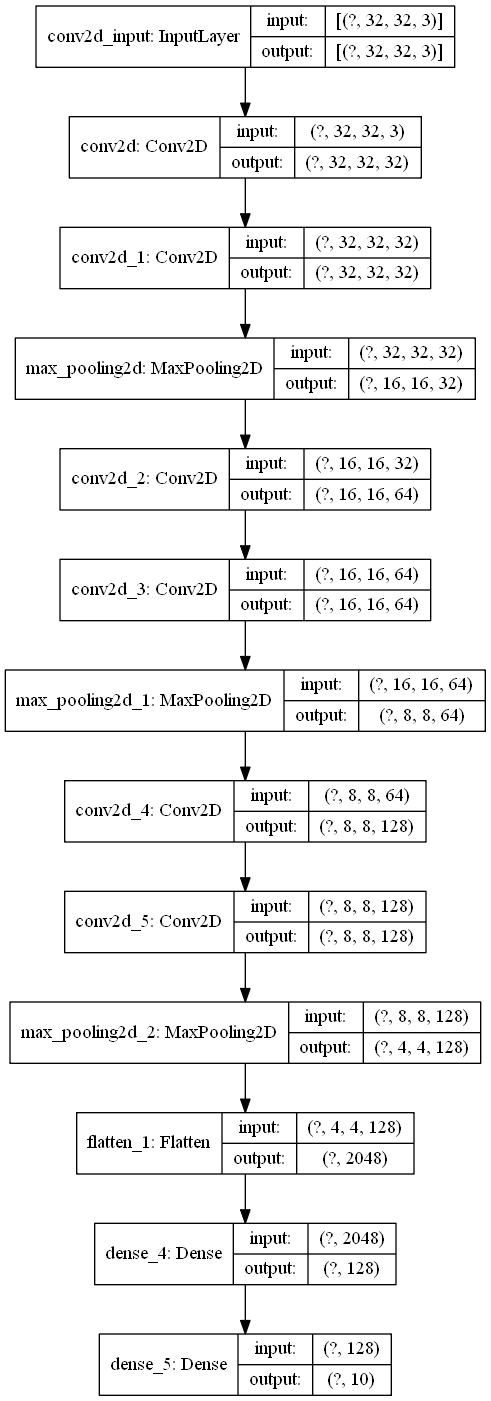

In [26]:
# Illustration model cnn in form of diagram
keras.utils.plot_model(model_cnn, "my_first_model_with_shape_info.png", show_shapes=True)

In [27]:
batch_size = 32
epochs = 11

In [28]:
#Train model cnn 
train_cnn = model_cnn.fit(x_train, y_train, batch_size=batch_size , validation_split = 0.2 , epochs=epochs)

Epoch 1/11
1250/1250 [==============================] - 187s 150ms/step - loss: 1.6947 - accuracy: 0.3810 - val_loss: 1.5753 - val_accuracy: 0.4594
Epoch 2/11
1250/1250 [==============================] - 188s 151ms/step - loss: 1.3181 - accuracy: 0.5275 - val_loss: 1.2461 - val_accuracy: 0.5518
Epoch 3/11
1250/1250 [==============================] - 187s 150ms/step - loss: 1.1236 - accuracy: 0.6048 - val_loss: 1.1084 - val_accuracy: 0.6125
Epoch 4/11
1250/1250 [==============================] - 188s 150ms/step - loss: 0.9937 - accuracy: 0.6490 - val_loss: 1.0616 - val_accuracy: 0.6271
Epoch 5/11
1250/1250 [==============================] - 189s 151ms/step - loss: 0.8825 - accuracy: 0.6919 - val_loss: 1.0360 - val_accuracy: 0.6392
Epoch 6/11
1250/1250 [==============================] - 185s 148ms/step - loss: 0.7982 - accuracy: 0.7211 - val_loss: 0.9012 - val_accuracy: 0.6928
Epoch 7/11
1250/1250 [==============================] - 186s 149ms/step - loss: 0.7129 - accuracy: 0.7525 - val_

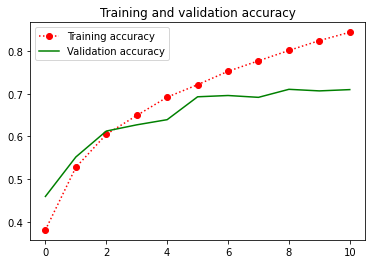

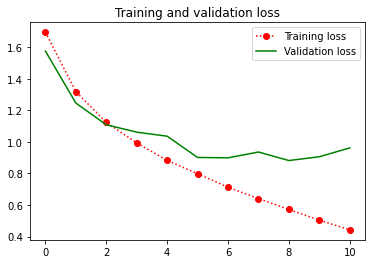

In [29]:
# Visualise model's accuracy during training
accuracy = train_cnn.history['accuracy']
val_accuracy = train_cnn.history['val_accuracy']
loss = train_cnn.history['loss']
val_loss = train_cnn.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo',linestyle="dotted", color="red", label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', color="green",label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo',linestyle="dotted", color="red", label='Training loss')
plt.plot(epochs, val_loss, 'b',color="green", label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
#Evaluate network performance of cifar10 test set
test_eval_cnn = model_cnn.evaluate(x_test , y_test)
print('Test loss of model cnn:', test_eval_cnn[0])
print('Test accuracy of model cnn:', test_eval_cnn[1])

313/313 [==============================] - 12s 38ms/step - loss: 0.9937 - accuracy: 0.6962
Test loss of model cnn: 0.9937286376953125
Test accuracy of model cnn: 0.6962000131607056


In [31]:
#Construct Classification Report on cifar10 test set
y_pred_cnn = model_cnn.predict(x_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

print("Classification Report : \n", classification_report(y_test , y_pred_classes_cnn))

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.88      0.77      0.82      1000
           2       0.54      0.65      0.59      1000
           3       0.44      0.62      0.52      1000
           4       0.63      0.70      0.66      1000
           5       0.71      0.44      0.54      1000
           6       0.79      0.77      0.78      1000
           7       0.90      0.60      0.72      1000
           8       0.82      0.82      0.82      1000
           9       0.72      0.84      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000



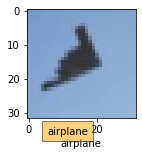

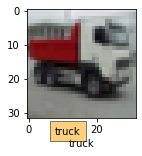

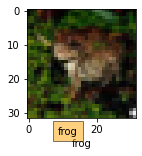

In [37]:
#Ploting example of model classification
plot_sample(x_test , y_test, 1785)
plt.figtext(0.5, 0.01, classes[y_pred_classes_cnn[1785]], ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

#Ploting example of model classification
plot_sample(x_test , y_test, 9754)
plt.figtext(0.5, 0.01, classes[y_pred_classes_cnn[9754]], ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

#Ploting example of model classification
plot_sample(x_test , y_test, 7870)
plt.figtext(0.5, 0.01, classes[y_pred_classes_cnn[7870]], ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

# the text inside the box is the predicted label and outside the box is the true label